In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

In [2]:
import flux_recoil_spec as frs
import importlib
import time
import pandas as pd
import atomic_structure as ats

In [3]:
#get the flux
Er= np.geomspace(100/1e7, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=np.float64(-0.3419890601701692), intercept=np.float64(-12.883178144228596), rvalue=np.float64(-0.995335235616547), pvalue=np.float64(2.8473572672920914e-06), stderr=np.float64(0.014824519476613363), intercept_stderr=np.float64(0.0627387526226588))
0.009995281867072022 0.01


In [4]:
#retrieve the recoil spectra for neutron-nuclear
isoGe,isodictGe=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Ge')
isoSi,isodictSi=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='Si')
#isoCaWO4,isodictCaWO4=frs.dRdErCompoundSave(Er,E,F,N=1,Comp='CaWO4') #not loading for some reason?

## Import Data

We compare event rate spectra for various backgrounds including gamma compton scattering, nuclear recoil, and tritium across both Ge and Si detectors, and add our evaluated contribution from neutron-electron scattering. We compare background data from the EDELWEISS collaboration
[[Optimizing EDELWEISS detectors for low-mass WIMP searches][EDW]], CRESST [[Geant4-based electromagnetic background model for the CRESST
 dark matter experiment][CRE]], and SuperCDMS at SNOLAB [[Projected Sensitivity of the SuperCDMS SNOLAB experiment][CDMS]], specifically data from the following figures.

<img src="sourcefigs/EDW_fig3.png" width="400" alt="EDELWEISS Experiment, event rate as a function of recoil energy">   <img src='sourcefigs/CRESST_fig12c.png' width='450' alt='CRESST'>

([EDELWEISS][EDS] fig 3 left, [CRESST][CRE] fig 12c right)

<img src='sourcefigs/CDMS_HV.png' width="400">   <img src="sourcefigs/CDMS_iZIP.png" width="415">

([SCDMS at SNOLAB][CDMS] fig 6 & 7 Silicon top, Germanium bottom, )

[EDW]: https://journals.aps.org/prd/pdf/10.1103/PhysRevD.97.022003
[CRE]: https://link.springer.com/article/10.1140/epjc/s10052-019-7385-0
[CDMS]: https://arxiv.org/pdf/1610.00006

In [5]:
#Event rate as a function of recoil energy - Tritium component of background spectra
f3_trit = pd.read_csv('../data_files/EDW/Fig3_Tritium.txt',encoding='utf-16',comment="#",header=None)
# EDELWEISS neutron distribution
f3_N = pd.read_csv('../data_files/EDW/Fig3_Neutrons.txt', encoding='utf-16', comment="#", header=None)

# CRESST - Internal Cosmogenic Bkgnds
f12c_IC = pd.read_csv('../data_files/CRESST/Fig12ckgkeVd_IC.txt',encoding='utf-16',comment="#",header=None)

#SuperCDMS at SNOLAB projected background sensitivity - Fig 7 Background Spectra after cuts in SILICON iZIP detectors
f7TR_cevns = pd.read_csv('../data_files/SNOLAB/Fig7TR_cevns.txt',comment="#",header=None) #Coherent elastic neutrino-nucleus scattering (dR/dE - rate per energy)
f7TR_compton = pd.read_csv('../data_files/SNOLAB/Fig7TR_compton.txt',encoding='utf-16',comment="#",header=None) #ERs from compton gamma rays
f7TR_surb = pd.read_csv('../data_files/SNOLAB/Fig7TR_SurfaceBetas.txt',encoding='utf-16',comment="#",header=None) #Surface Betas
f7TR_surs = pd.read_csv('../data_files/SNOLAB/Fig7TR_SurfaceScattering.txt',encoding='utf-16',comment="#",header=None) #Surface Scatter
f7TR_nu = pd.read_csv('../data_files/SNOLAB/Fig7TR_neutrons.txt',comment="#",header=None) # NEUTRONS
f7TR_total = pd.read_csv('../data_files/SNOLAB/Fig7TR_total.txt',encoding='utf-16',comment="#",header=None) #total

#SuperCDMS at SNOLAB projected background sensitivity - Fig 6 Background Spectra after cuts in SILICON HV detectors
f6TR_cevns = pd.read_csv('../data_files/SNOLAB/Fig6TR_cevns.txt',comment="#",header=None) #Coherent elastic neutrino-nucleus scattering
f6TR_compton = pd.read_csv('../data_files/SNOLAB/Fig6TR_compton.txt',comment="#",header=None) #ERs from compton gammas
f6TR_surb = pd.read_csv('../data_files/SNOLAB/Fig6TR_SurfaceBetas.txt',encoding='utf-16',comment="#",header=None) #surface Betas
f6TR_surs = pd.read_csv('../data_files/SNOLAB/Fig6TR_SurfaceScattering.txt',encoding='utf-16',comment="#",header=None) #surface scatter
f6TR_nu = pd.read_csv('../data_files/SNOLAB/Fig6TR_neutrons.txt',encoding='utf-16',comment="#",header=None) # Neutrons
f6TR_total = pd.read_csv('../data_files/SNOLAB/Fig6TR_total.txt',comment="#",header=None) #tot

#SuperCDMS at SNOLAB projected background sensitivity - Fig 7 Background Spectra after cuts in GERMANIUM iZIP detectors
f7BR_cevns = pd.read_csv('../data_files/SNOLAB/Fig7BR_cevns.txt',comment="#",header=None)
f7BR_compton = pd.read_csv('../data_files/SNOLAB/Fig7BR_compton.txt',encoding='utf-16',comment="#",header=None)
f7BR_surb = pd.read_csv('../data_files/SNOLAB/Fig7BR_SurfaceBetas.txt',encoding='utf-16',comment="#",header=None)
f7BR_surs = pd.read_csv('../data_files/SNOLAB/Fig7BR_SurfaceScattering.txt',encoding='utf-16',comment="#",header=None)
f7BR_nu = pd.read_csv('../data_files/SNOLAB/Fig7BR_neutrons.txt',comment="#",header=None)
f7BR_total = pd.read_csv('../data_files/SNOLAB/Fig7BR_total.txt',comment="#",header=None)
f7BR_Ge = pd.read_csv('../data_files/SNOLAB/Fig7BR_GeActivation.txt',encoding='utf-16',comment="#",header=None)

#SuperCDMS at SNOLAB projected background sensitivity - Fig 6 Background Spectra after cuts in GERMANIUM HV detectors
f6BR_cevns = pd.read_csv('../data_files/SNOLAB/Fig6BR_cevns.txt',encoding='utf-16',comment="#",header=None)
f6BR_compton = pd.read_csv('../data_files/SNOLAB/Fig6BR_compton.txt',encoding='utf-16',comment="#",header=None)
f6BR_surb = pd.read_csv('../data_files/SNOLAB/Fig6BR_SurfaceBetas.txt',encoding='utf-16',comment="#",header=None)
f6BR_surs = pd.read_csv('../data_files/SNOLAB/Fig6BR_SurfaceScattering.txt',encoding='utf-16',comment="#",header=None)
f6BR_nu = pd.read_csv('../data_files/SNOLAB/Fig6BR_neutrons.txt',encoding='utf-16',comment="#",header=None)
f6BR_total = pd.read_csv('../data_files/SNOLAB/Fig6BR_total.txt',encoding='utf-16',comment="#",header=None)
f6BR_Ge = pd.read_csv('../data_files/SNOLAB/Fig6BR_GeActivation.txt',encoding='utf-16',comment="#",header=None)

Do the high voltage ones for SuperCDMS and add the neutron line from EDELWEISS


In [6]:
#attempt to implement analytically -- from appendix
def tritium(E):
    p0 = 1.406e-8
    p1 = 18.6
    p2 = 511
    array = p0*(p1-E)**2*(p2+E)*(E**2+2*p2*E)**(1/2)
    for i,x in enumerate(E):
        if x > p1: array[i] = 0
    return array

def surfbet(E):
    p0 = 1.34
    p1 = -0.058
    p2 = 0.2
    p3 = 40
    p4 = 11.4
    return p0*np.exp(p1*E)+p2*np.exp(-(E-p3)**2/(2*p4**2))

def lead(E):
    p0 = 0.037
    p1 = 0.15
    p2 = 95
    p3 = 5.7
    return p0+p1*np.exp(-(E-p2)**2/(2*p3**2))

def heat(E):
    p0 = 38.2725
    p1 = 0.293
    p2 = 1.4775
    p3 = 0.0812
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

def neutrons(E):
    p0 = 4.827e-4
    p1 = 0.3906
    p2 = 2.986e-4
    p3 = 0.05549
    return p0*np.exp(-p1*E)+p2*np.exp(-p3*E)

In [7]:
Er_ne= np.geomspace(0.1e-4, 100e-3, 1000)
drde_ne,dsig_ne=frs.dRdErNE(Er_ne,E,F,N=1,Z=14,A=28)
Er_ne_ge= np.geomspace(0.1e-5, 100e-3, 2000)
drde_ne_ge,dsig_ne_ge=frs.dRdErNE(Er_ne_ge,E,F,N=1,Z=32,A=70)

#K 1s L1 2s L2 2p1/2 L3 2p3/2 M1 3s M2 3p1/2 M3 3p3/2 M4 3d3/2 M5 3d5/2 N1 4s N2 4p1/2 N3 4p3/2
#32 Ge 11103 1414.6*b 1248.1*b 1217.0*b 180.1* 124.9* 120.8* 29.8 29.2

shell_energies = np.array([1.12, 99.2, 150, 1839])/1000
electron_number = np.array([4, 6, 2, 2])

drde_mod = ats.mod_and_plot(Er_ne, drde_ne, shell_energies, electron_number, plot=False)
drde_mod=np.asarray(drde_mod)
drde_mod[drde_mod<0]=0


shell_energies_Ge = np.array([29.2, 29.8, 120.8, 124.8, 180.1, 1217, 1248.1, 1414.6, 11103])/1000
electron_number_Ge = np.array([2, 2, 6, 2, 6, 10, 4, 2, 2])

drde_mod_ge = ats.mod_and_plot(Er_ne_ge, drde_ne_ge, shell_energies_Ge, electron_number_Ge, plot=False)
drde_mod_ge = np.asarray(drde_mod_ge)
drde_mod_ge[drde_mod_ge<0]=0

14
32


In [8]:
#combine the neutron scattering data
from scipy.interpolate import CubicSpline

Si_nn = CubicSpline(Er*1000,5.28e-6*isoSi[:,0])
Si_ne = CubicSpline(Er_ne*1000,5.28e-6*np.asarray(drde_mod))

# 1-D linear interpolation btwn gaps

Er_full= np.geomspace(0.1e-4, 100e-3, 10000)
isoSi_interp = np.interp(Er_full*1000,Er*1000,5.28e-6*isoSi[:,0])
neSi_interp = np.interp(Er_full*1000,Er_ne*1000,5.28e-6*np.asarray(drde_mod))

isoGe_interp = np.interp(Er_full*1000,Er*1000,1.78e-4*isoGe[:,0])
neGe_interp = np.interp(Er_full*1000,Er_ne_ge*1000,1.78e-4*np.asarray(drde_mod_ge))



FileNotFoundError: [Errno 2] No such file or directory: 'figures/EDW-SCDMS-tritium-compare.pdf'

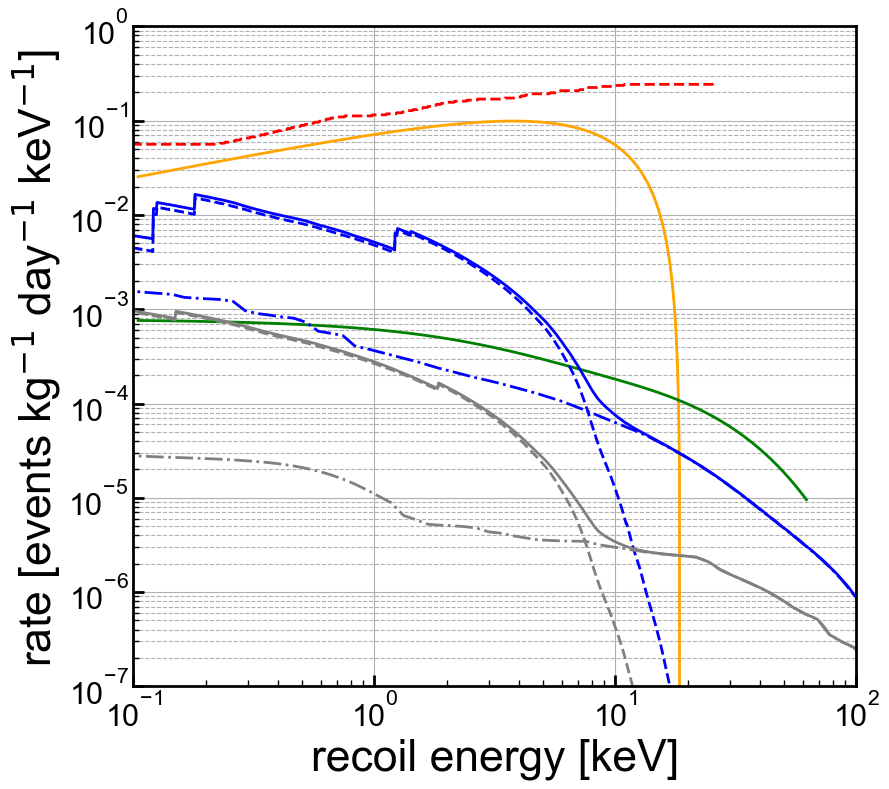

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#ax1.plot(Er*1000, 1.35e-3*isoCaWO4[:,0],color='k',label="CaWO4")


#ax1.plot(f12c_IC[0],f12c_IC[1],label='IC',color='orange')
#ax1.plot(f7TR_compton[0],f7TR_compton[1]/365,label='Compton',color='r')
ax1.plot(f6TR_compton[0],f6TR_compton[1]/365,label='Compton - Si',color='r',linestyle='--')
ax1.plot(f3_trit[0],tritium(f3_trit[0]),label='EDW Tritium',color='orange')

ax1.plot(f3_N[0], neutrons(f3_N[0]), label = 'EDW Neutron - Germanium', color='green')
#ax1.plot(f3_N[0], f3_N[1], label ="EDW neut 2", color = 'magenta')

ax1.plot(Er_ne*1000, 5.28e-6*np.asarray(drde_mod),label="neutron-electron",linestyle='--',color='gray')
ax1.plot(Er_ne_ge*1000, 1.78e-4*np.asarray(drde_mod_ge),label="neutron-electron",linestyle='--',color='b')

ax1.plot(Er*1000, 5.28e-6*isoSi[:,0],color='gray',label="Si",linestyle='-.')
ax1.plot(Er*1000, 1.78e-4*isoGe[:,0],color='b',label="Ge",linestyle='-.')

ax1.plot(Er_full*1000, isoSi_interp+neSi_interp,label="neutron-electron",linestyle='-',color='gray')
ax1.plot(Er_full*1000, isoGe_interp+neGe_interp,label="neutron-electron",linestyle='-',color='b')



ymin = 1e-7
ymax = 1e0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 1e-1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/EDW-SCDMS-tritium-compare.pdf')
plt.legend(loc='lower left', fontsize='medium')
plt.show()

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#ax1.plot(Er*1000, 1.35e-3*isoCaWO4[:,0],color='k',label="CaWO4")
ax1.plot(Er*1000, 5.28e-6*isoGe[:,0],color='b',label="Ge",linestyle='-.')

#ax1.plot(f12c_IC[0],f12c_IC[1],label='IC',color='orange')
ax1.plot(f7BR_compton[0],f7BR_compton[1]/365,label='Compton',color='r')
ax1.plot(f6BR_compton[0],f6BR_compton[1]/365,label='Compton',color='r',linestyle='--')

ax1.plot(Er_ne_ge*1000, 5.28e-6*np.asarray(drde_mod_ge),label="",linestyle='--',color='b')

#ax1.plot(Er*1000, Si_nn(Er*1000)+Si_ne(Er*1000),label="neutron-electron",linestyle='-',color='gray')
ax1.plot(Er_full*1000, (5.28e-6/1.74e-4)*(isoGe_interp+neGe_interp),label="neutron-electron",linestyle='-',color='b')



ymin = 1e-7
ymax = 1e0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 1e-1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/cawo4-nn-spec-compound.png')
plt.show()